<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Sprint Machine Learning Scratch

## [Problem 1] Scratch of train_test_split​

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    # Write code here
    assert train_size > 0 and train_size < 1., "train_test_split: Invalid training size"

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    t = round(len(indices) * train_size)
    train_indices, test_indices = indices[:t], indices[t:]

    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [116]:
X, y = np.arange(10).reshape((5, 2)), np.arange(5)
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, 0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4, 2) (1, 2) (4,) (1,)
(4, 2) (1, 2) (4,) (1,)


## [Problem 2] Creating a code to solve the classification problem

In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

def train_and_validate(X_train, X_val, y_train, y_val, model, model_name):
    print("*" * 10 + model_name + "*" * 10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))
    plot_confusion_matrix(model, X_val, y_val)
    plt.show()

def solve_classification(X, y):
    models = [SGDClassifier(loss="log"), SVC(), DecisionTreeClassifier()]
    model_names = ["Logistic Regression", "SVM", "Decision Tree"]

    X_train, X_val, y_train, y_val = scratch_train_test_split(X, y, 0.8)
    for model, name in zip(models, model_names):
        train_and_validate(X_train, X_val, y_train, y_val, model, name)

# Compare with true train_test_split
def standard_classification(X, y):
    models = [SGDClassifier(loss="log"), SVC(), DecisionTreeClassifier()]
    model_names = ["Logistic Regression", "SVM", "Decision Tree"]

    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)
    for model, name in zip(models, model_names):
        train_and_validate(X_train, X_val, y_train, y_val, model, name)

Iris Dataset

**********Logistic Regression**********
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



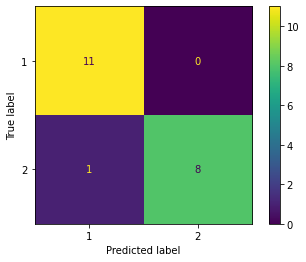

**********SVM**********
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



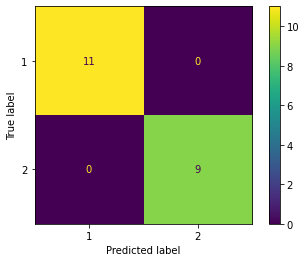

**********Decision Tree**********
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



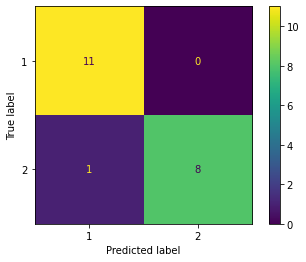

In [118]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X, y = X[np.isin(y, [1, 2])], y[np.isin(y, [1, 2])]

solve_classification(X, y)

**********Logistic Regression**********
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



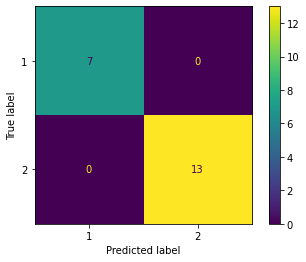

**********SVM**********
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



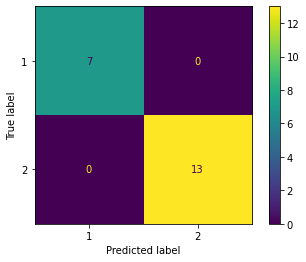

**********Decision Tree**********
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



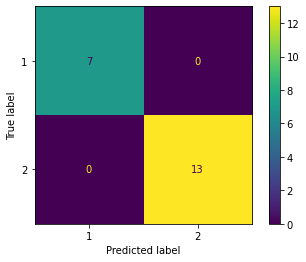

In [119]:
standard_classification(X, y)

Simple Dataset 1

**********Logistic Regression**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



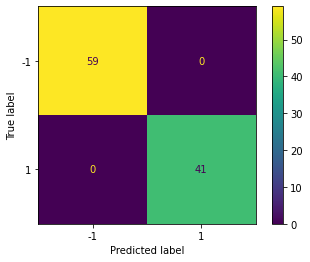

**********SVM**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



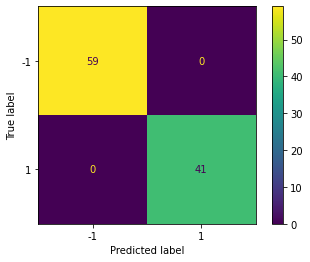

**********Decision Tree**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



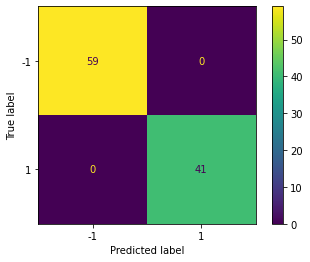

In [120]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

solve_classification(X, y)

**********Logistic Regression**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



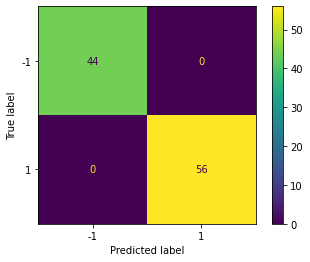

**********SVM**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



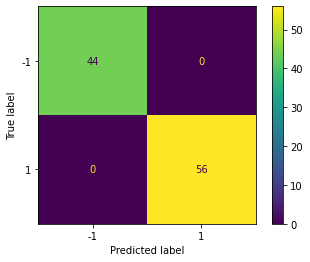

**********Decision Tree**********
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



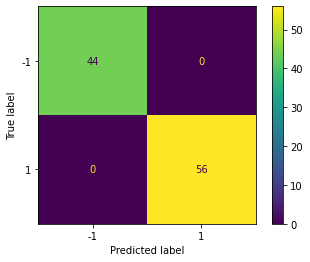

In [121]:
standard_classification(X, y)

Simple Dataset 2

**********Logistic Regression**********
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.50      0.20      0.29         5

    accuracy                           0.38         8
   macro avg       0.42      0.43      0.37         8
weighted avg       0.44      0.38      0.35         8



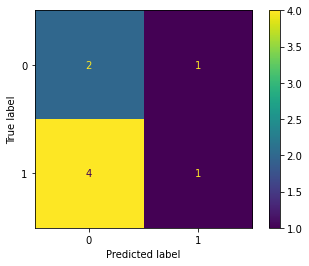

**********SVM**********
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


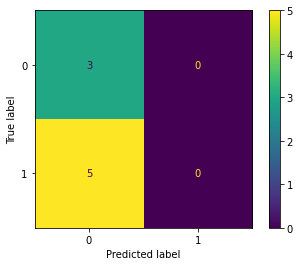

**********Decision Tree**********
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.67      0.40      0.50         5

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8



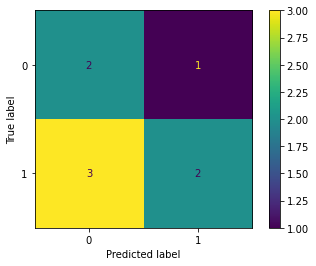

In [122]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

solve_classification(X, y)

**********Logistic Regression**********
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



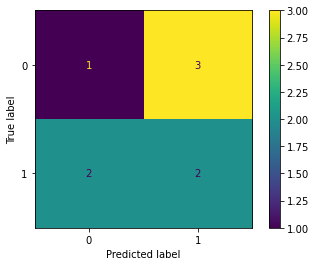

**********SVM**********
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.25      0.25      0.25         4

    accuracy                           0.25         8
   macro avg       0.25      0.25      0.25         8
weighted avg       0.25      0.25      0.25         8



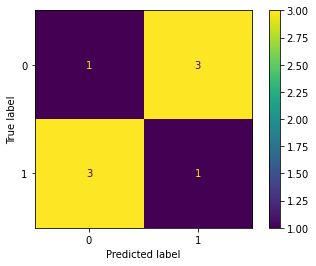

**********Decision Tree**********
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



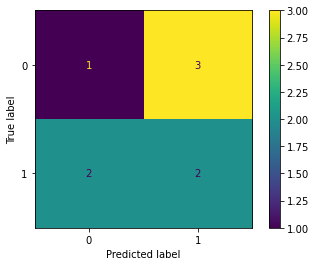

In [123]:
standard_classification(X, y)

## [Problem 3] Creating a code to solve the regression problem



In [124]:
import pandas as pd

data = pd.read_csv("sample_data/train.csv")
print(data.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


(1168, 2) (292, 2) (1168,) (292,)
1874898576.8884864


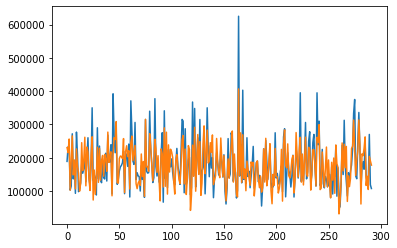

In [125]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def solve_regression(X, y, model):
    X_train, X_val, y_train, y_val = scratch_train_test_split(X, y, 0.8)
    print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(mean_squared_error(y_val, y_pred))

    plt.plot(y_val)
    plt.plot(y_pred)
    plt.show()

X, y = data[["GrLivArea", "YearBuilt"]].values, data["SalePrice"].values

model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
solve_regression(X, y, model)